<a href="https://colab.research.google.com/github/ara42/Machine-Learning/blob/main/%ED%9A%8C%EA%B7%80(%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95_internal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [7]:
x = np.arange(-10,10,0.1)
y = np.array([3*e + 7 + np.random.normal(0,6) for e in x])

In [8]:
import matplotlib.pyplot as plt

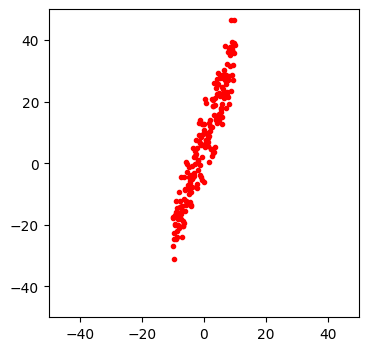

In [9]:
plt.figure(figsize=(4,4))
plt.plot(x,y,'r.')
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.show()

In [25]:
def mse(actual, pred):
    return np.sum((actual - pred)**2)/len(actual)

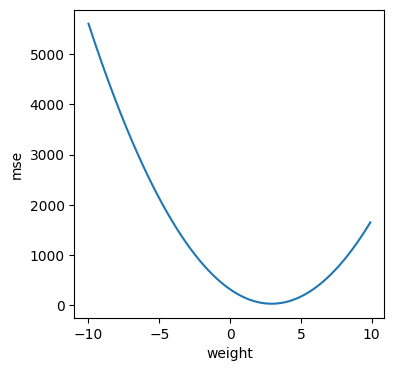

In [27]:
b= 7
wl = np.arange(-10,10,0.1)
pl = np.array([[w *e + b for e in x] for w in wl])
mses =np.array([ mse(y,p) for p in pl])
plt.figure(figsize=(4,4))
plt.plot(wl,mses)
plt.xlabel('weight')
plt.ylabel('mse')
plt.show()

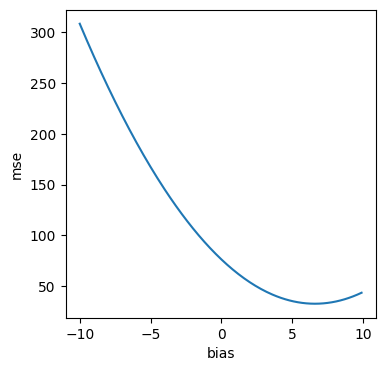

In [28]:
w= 3
bl = np.arange(-10,10,0.1)
pl = np.array([[w *e + b for e in x] for b in bl])
mses =np.array([ mse(y,p) for p in pl])
plt.figure(figsize=(4,4))
plt.plot(wl,mses)
plt.xlabel('bias')
plt.ylabel('mse')
plt.show()

In [29]:
def gradient(x,y,w,b):
    pred = w * x + b
    error = y - pred
    n = len(y)
    wg = -2*sum(x*error)/n
    bg = -2*sum(error)/n
    return wg,bg,mse(y,pred)

In [30]:
gradient(x,y,0,7)

(-195.4265851297686, 1.0816031830465231, 319.00429989000213)

In [48]:
def gradient_desent(x,y,lr=0.001):
    w = np.random.uniform(-1,1)
    b = np.random.uniform(-10,10)
    hist=[]
    for i in range(10000):
      wg,bg,r = gradient(x,y,w,b)
      if (i<5)|(i%100==0):
        hist.append([i,round(w,3),round(wg,3),round(b,3),round(bg,3),round(r,3)])
      w = w - wg*lr
      b = b - bg*lr
    return w,b,hist

In [49]:
w, b, hist = gradient_desent(x,y)
w, b

(2.9306608410777386, 6.605731448879289)

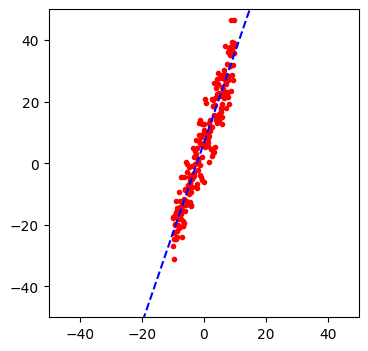

In [50]:
plt.figure(figsize=(4,4))
plt.plot(x,y,'r.')
plt.plot([-50,50],[-50*w+b, 50*w+b],'b--')
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.show()

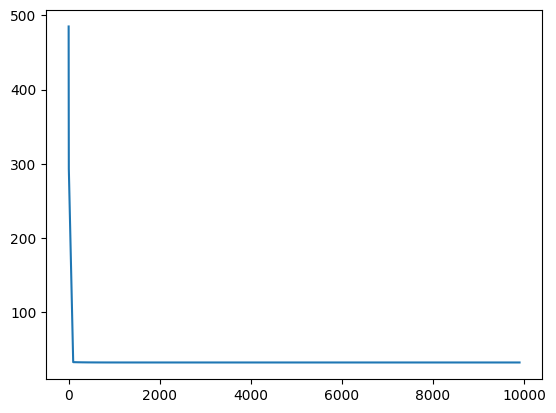

In [51]:
xi = [i for i,_,_,_,_,_ in hist]
rl = [r for _,_,_,_,_,r in hist]
plt.plot(xi,rl)
plt.show()

In [44]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [ ]:
from sklearn.datasets import load_boston #더이상 데이터 제공 안 함

In [43]:
path = '/content/drive/MyDrive/Colab Notebooks/Machine-Learning/boston_house.csv'

In [45]:
df = pd.read_csv(path)
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [52]:
import seaborn as sns

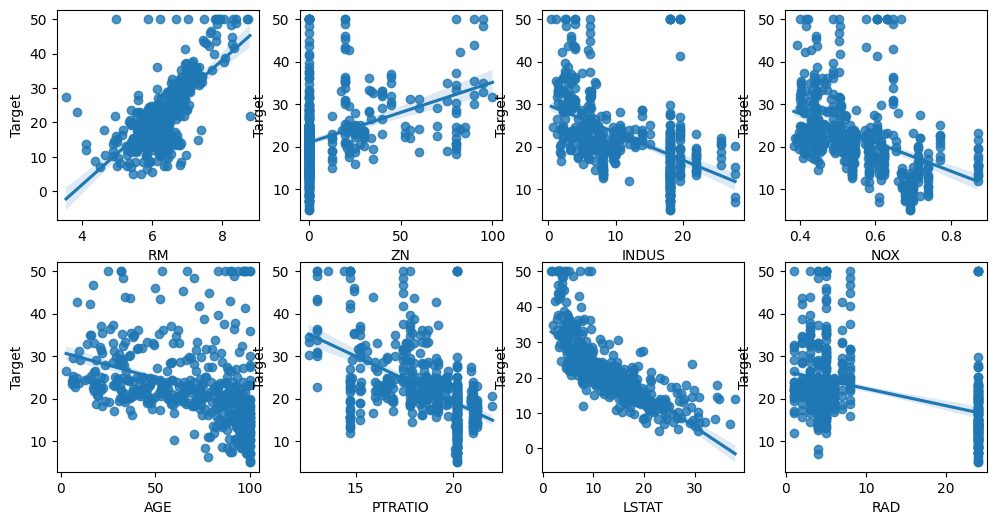

In [53]:
fig, axs = plt.subplots(ncols=4,nrows=2,figsize=(12,6))
features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(features):
    row = int(i/4)
    col=i%4
    sns.regplot(x=feature,y='Target',data=df,ax=axs[row][col])
plt.show()

In [54]:
data = df.drop('Target',axis=1)
label = df['Target']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(data,label)

In [57]:
model = LinearRegression() #모델 생성
model.fit(x_train ,y_train) #모델 학습
pred = model.predict(x_test) #예측
model.score(x_test,y_test)

0.6768644077675954

In [58]:
from sklearn.metrics import r2_score

In [59]:
r2_score(y_test,pred)

0.6768644077675954

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
mse = mean_squared_error(y_test, pred)
np.sqrt(mse)

5.034004838117858

In [62]:
model.intercept_

36.20332630828888

In [64]:
model.coef_

array([ 2.89874464e-03,  9.73485182e-03,  3.68645768e+00, -8.54095600e-02,
       -1.43185249e+00,  1.89672072e-02, -6.00529739e-01, -1.68842608e+01,
       -9.03833115e-01,  2.57583821e-01,  4.05295978e-02, -1.09546413e-02,
        2.82010798e+00])

In [65]:
data.iloc[0]

AGE         65.20000
B          396.90000
RM           6.57500
CRIM         0.00632
DIS          4.09000
INDUS        2.31000
LSTAT        4.98000
NOX          0.53800
PTRATIO     15.30000
RAD          1.00000
ZN          18.00000
TAX        296.00000
CHAS         0.00000
Name: 0, dtype: float64

In [66]:
x0 = data.iloc[0]
s = 0
for i in range(len(x0)):
    s += x0[i] * model.coef_[i]
s += model.intercept_
print(s)

30.52306988452328
